# important modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind 
import scipy.stats as stats
warnings.filterwarnings('ignore')





In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
#create a db connection
conn=sqlite3.connect('inventory.db')

#fetching vendor summary table
df=pd.read_sql_query("""select * from vendor_summ_table """,conn)

In [11]:
df.head()

,VendorName,VendorNumber,Brand,Description,PurchasePrice,actual_price,Volume,total_purchase_quantity,total_purchase_dollars,total_quantity,total_dollars,total_sales,total_ExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,4.637575,1.338647
1,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,3.423063,1.266830
2,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,2.460635,1.327594
3,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,2.082734,1.372493
4,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,3.951794,1.396897


# Exploratory data analysis
    - Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which one should be included in the final analysis
    - In this phase of EDA, we will analyze the resultant table to gain insights into distribution of each column. This will help us understand data pattern , identify anomalies, and ensure data quality before proceeding with further analysis

In [13]:
#summary statistics 
df.describe().T  # T for transpose 

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
total_purchase_quantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
total_purchase_dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
total_quantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
total_dollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
total_sales,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [15]:
#distribution plot for numeric columns
numerical_cols=df.select_dtypes(include=np.number).columns

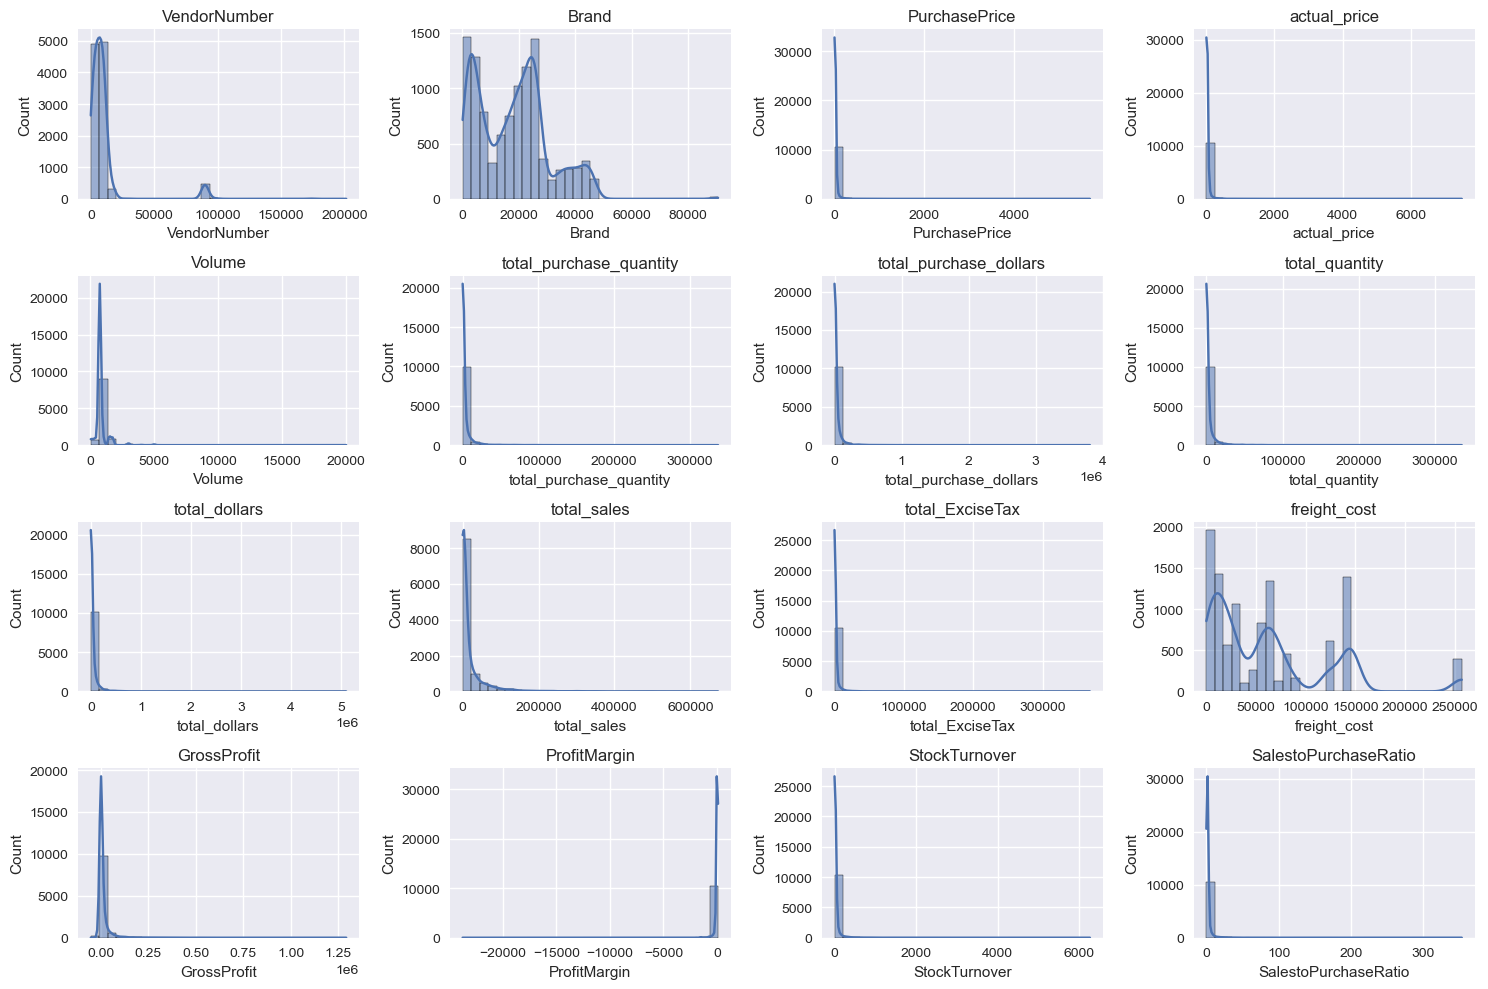

In [17]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # adjust grid layout as needed 
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()


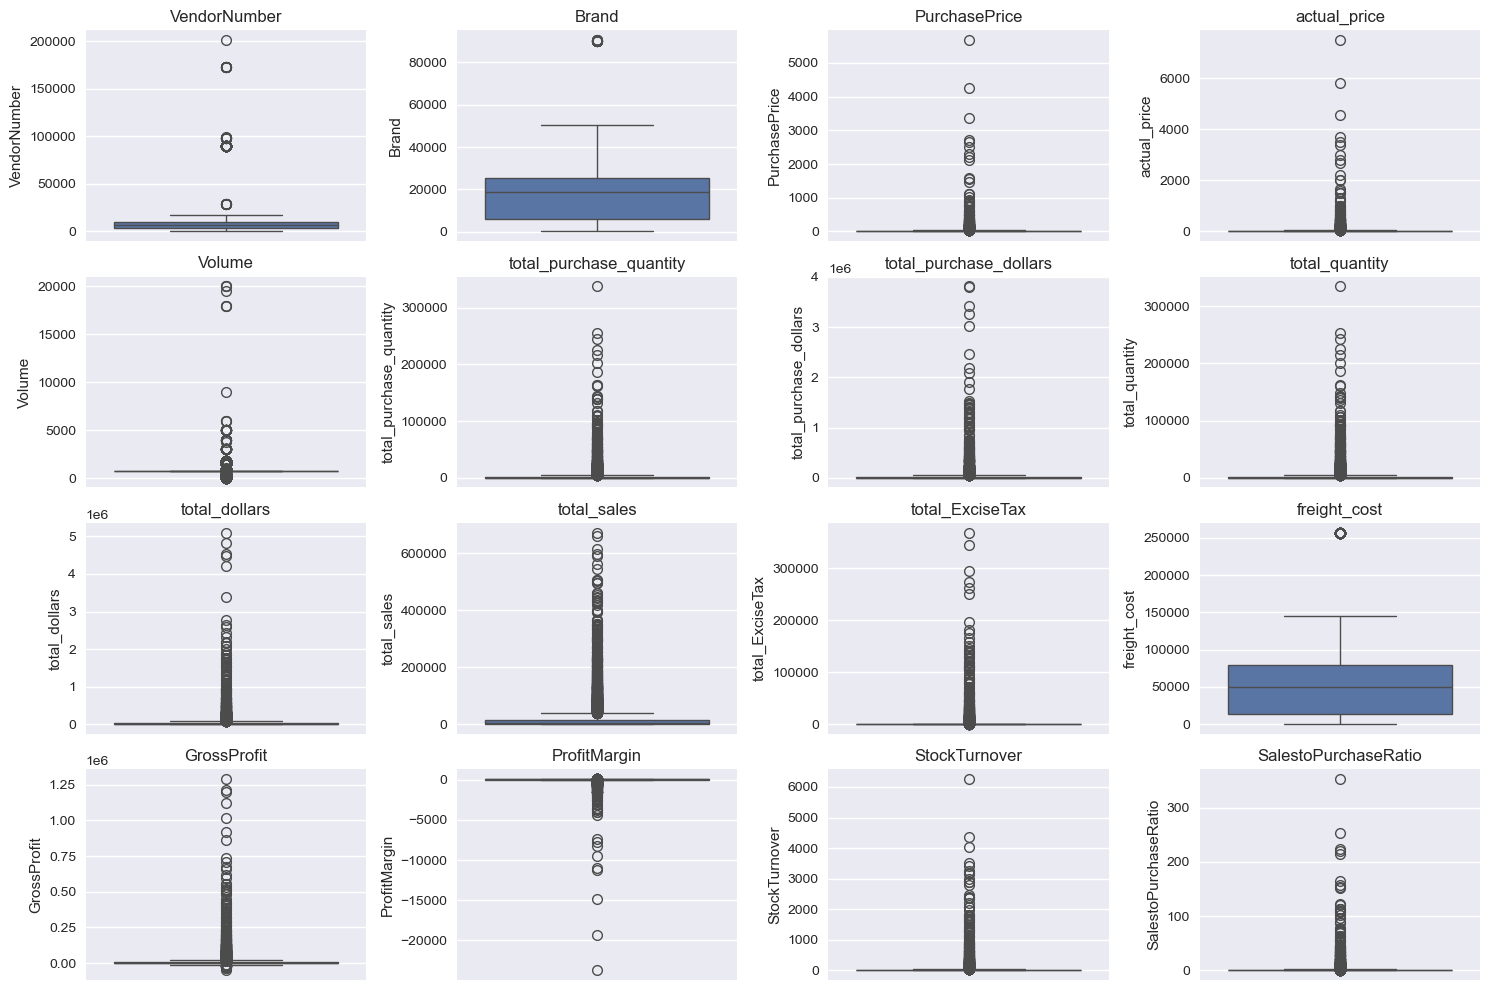

In [19]:
# outlier detection with boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()





# summary statistic insights 
    # negative and zero values :
    - Gross profit : minimum value is -52,002.78 , indicating losses. Some products or transactions may be selling at a loss due to high cost or selling at discounts lower than the purchase price.
    - Profit Margin : has min of -infinative, which suggest cases where revenue is zero or even lower than cost.
    - Total Sales Quantity & Sales Dollars : Minimum value are 0 , meaning some product were purchase but never sold. These could be slow moving or obsolete stock.
    # Outliers indicated by high standard deviations : 
    - Purchase and actual prices : The max values (5681.81, 7499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products
    - Freigh Cost : Huge variation from 0.09 to 257,032,.07, suggest logistic inefficiencies or bulk shipments.
    - Stock Turnover: Ranges from 0 to 274.5, implying some product sell extremely fast while others remain in stock indefinitly, Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are beign fullfilled from older stock.
    
    


In [22]:
df.columns

Index(['VendorName', 'VendorNumber', 'Brand', 'Description', 'PurchasePrice',
       'actual_price', 'Volume', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_quantity', 'total_dollars',
       'total_sales', 'total_ExciseTax', 'freight_cost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [24]:
#filter data by removing the inconsistancies
df=pd.read_sql_query(""" select * from vendor_summ_table
where GrossProfit > 0
and ProfitMargin > 0
and total_quantity > 0""",conn)

In [26]:
df

,VendorName,VendorNumber,Brand,Description,PurchasePrice,actual_price,Volume,total_purchase_quantity,total_purchase_dollars,total_quantity,total_dollars,total_sales,total_ExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,4.637575,1.338647
1,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,3.423063,1.266830
2,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,2.460635,1.327594
3,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,2.082734,1.372493
4,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,3.951794,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,WINE GROUP INC,9815,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,5.480000,6.041667
8560,SAZERAC CO INC,8004,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,0.245000,28.059829
8561,HEAVEN HILL DISTILLERIES,3924,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,0.495000,1.337838
8562,DIAGEO NORTH AMERICA INC,3960,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,77.610000,97.469388


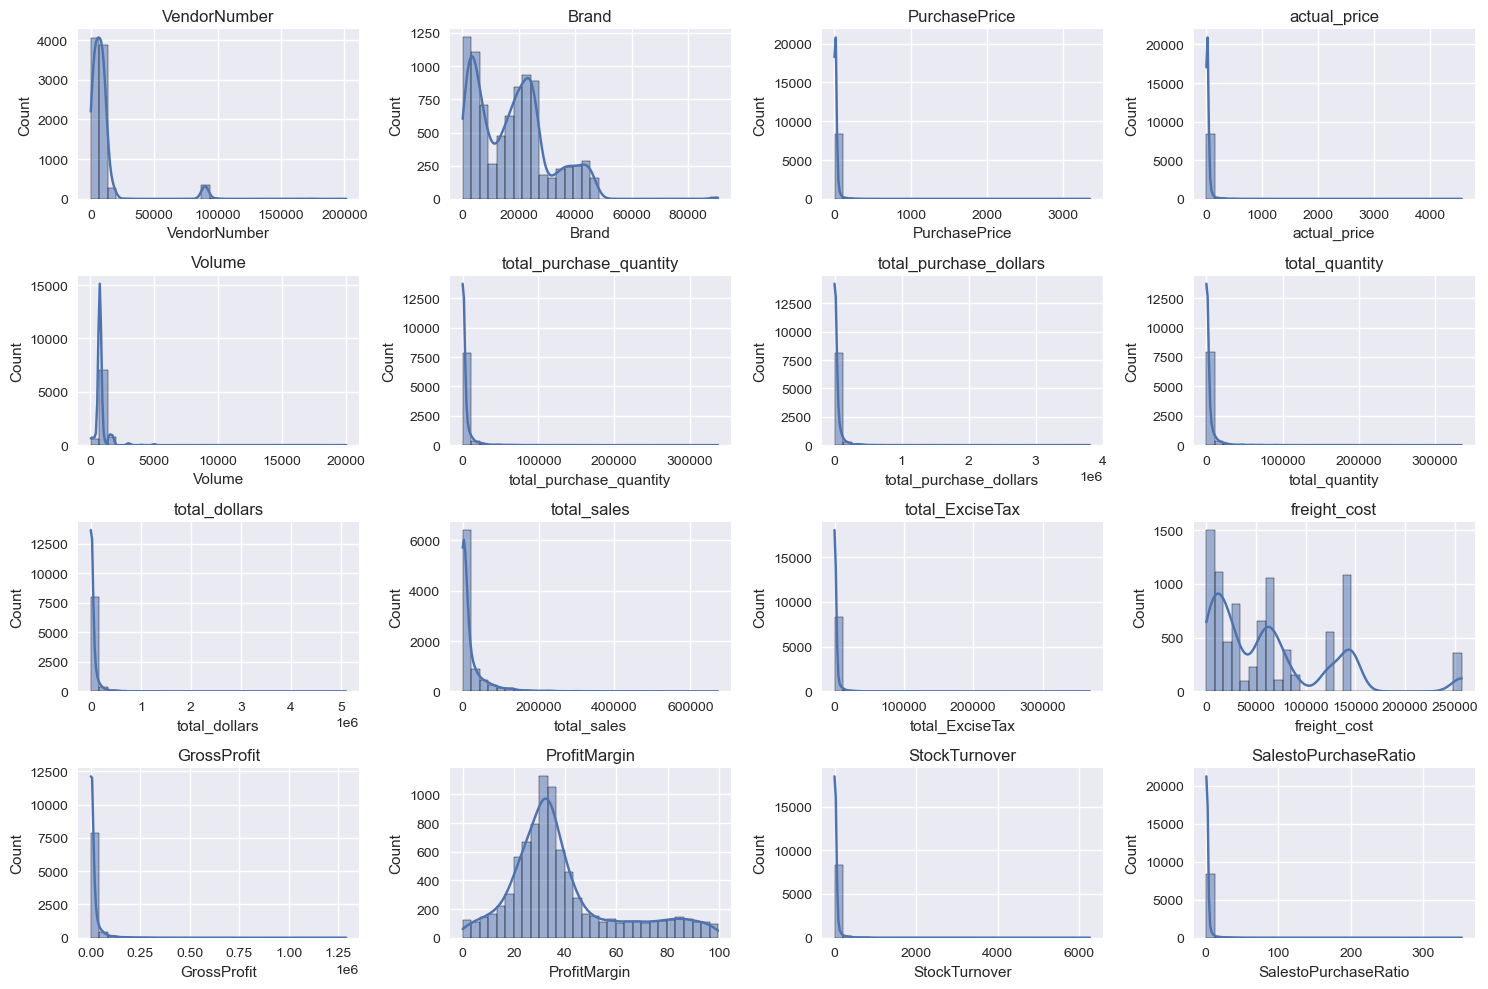

In [28]:
#distribution plot for new df
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # adjust grid layout as needed 
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()


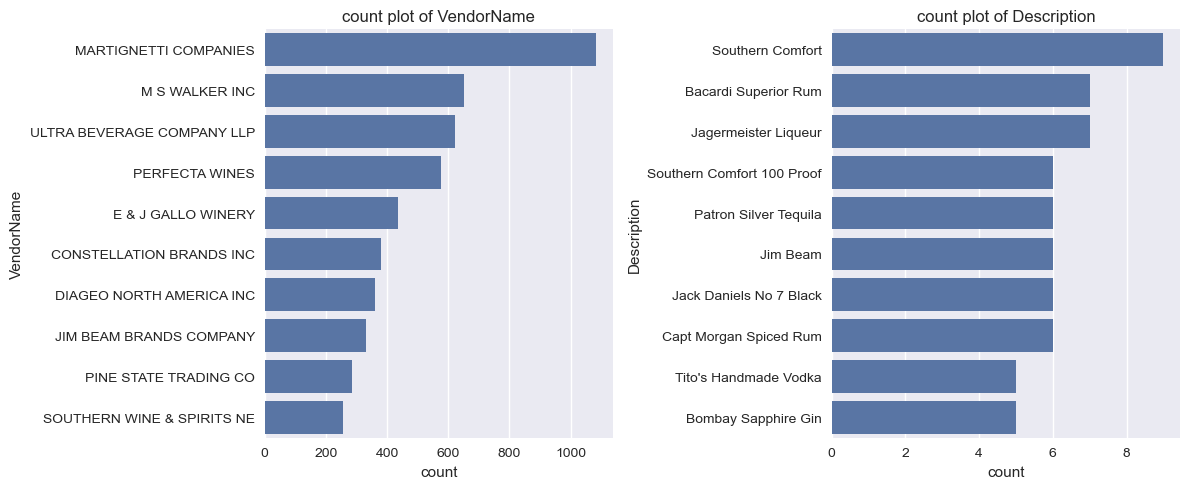

In [29]:
#count plot for categorical columns
categorical_cols=['VendorName','Description']
plt.figure(figsize=(12,5))
for i,cols in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[cols],order=df[cols].value_counts().index[:10]) #top 10 category
    plt.title(f"count plot of {cols}")

plt.tight_layout()
plt.show()


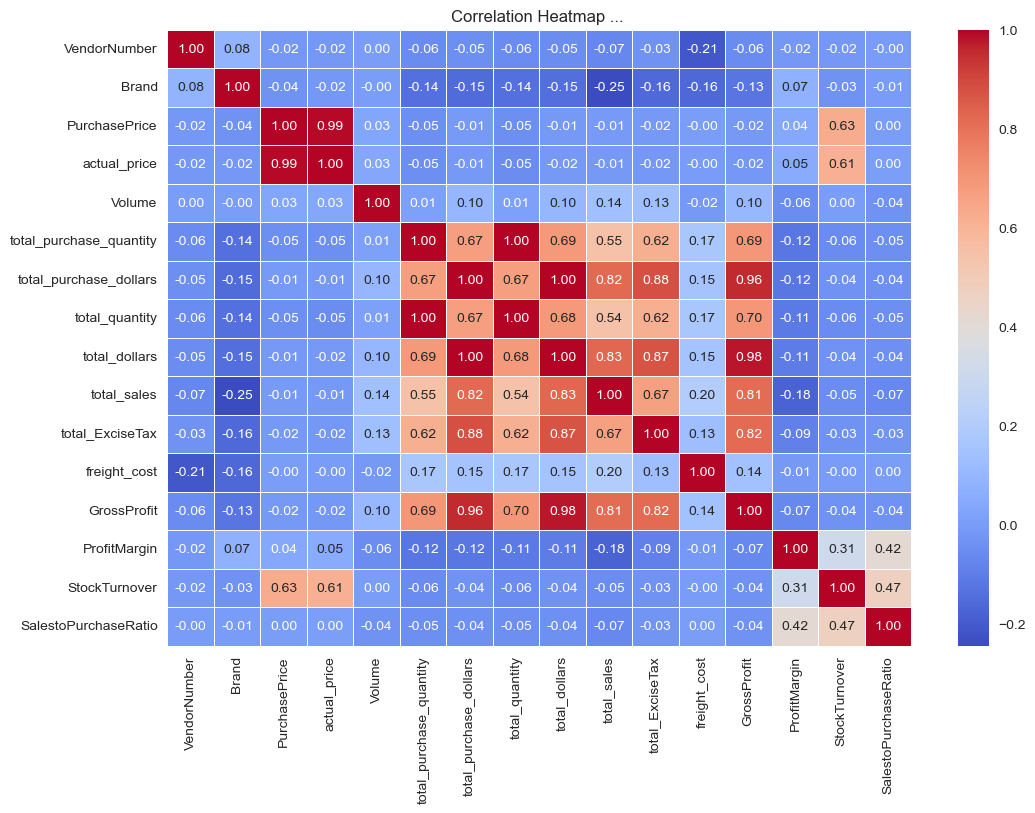

In [34]:
#now we check the relation between numeric and descriptive data types
# we can do it by using hitmap 
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Heatmap ... ")
plt.show()

# correlation Insights
    . purchasePrice has weak correlation with total sales dollars (-0.012) and gross profit(-0.016),suggesting that price variation do not significantly impact sales revenue or profit 
    . strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover
    . Negative correlation between profit margin & total sales price (-0.179)suggest that as sales price increase ,margin decrease, possibly due to competitive pricing pressures.
    . StockTurnover has weak negative correlation with both grossprofit (-0.038) and profitmargin (-0.055),indicating that faster turnover does not necessarily result in higher profitability

# Data Analysis
 # Identify Brands that need promotional and pricing adjustments which exhibit lower sales performance but higher profit margis.

In [38]:
df.columns

Index(['VendorName', 'VendorNumber', 'Brand', 'Description', 'PurchasePrice',
       'actual_price', 'Volume', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_quantity', 'total_dollars',
       'total_sales', 'total_ExciseTax', 'freight_cost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [40]:
brand_performance=df.groupby('Description').agg({
    'total_dollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [42]:
low_sales_threshold=brand_performance['total_dollars'].quantile(0.15)
high_profit_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [44]:
low_sales_threshold

560.299

In [46]:
high_profit_threshold

64.97017552750113

In [48]:
#filter out the low sales but high profit margin
target_brands=brand_performance[(brand_performance['total_dollars'] <= low_sales_threshold)&
(brand_performance['ProfitMargin'] >= high_profit_threshold)]
print("Brands with low sales but high profit margins : ")
display(target_brands.sort_values('total_dollars'))

Brands with low sales but high profit margins : 


,Description,total_dollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


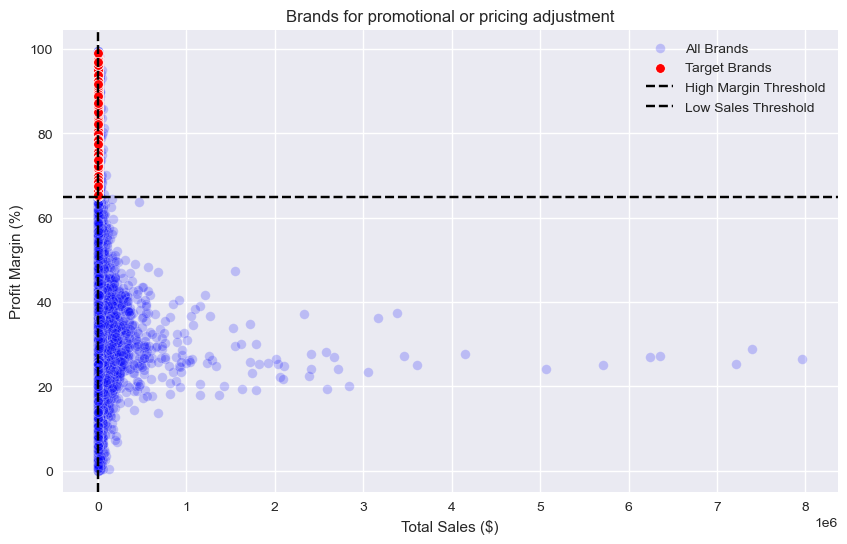

In [50]:
#we can visualise using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x="total_dollars",y="ProfitMargin",color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x="total_dollars",y="ProfitMargin",color="red",label="Target Brands")
plt.axhline(high_profit_threshold,linestyle="--",color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold,linestyle="--",color='black',label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing adjustment")
plt.legend()
plt.grid(True)
plt.show()




In [52]:
# for better view we can adjust the value
brand_performance=brand_performance[brand_performance['total_dollars']<10000]

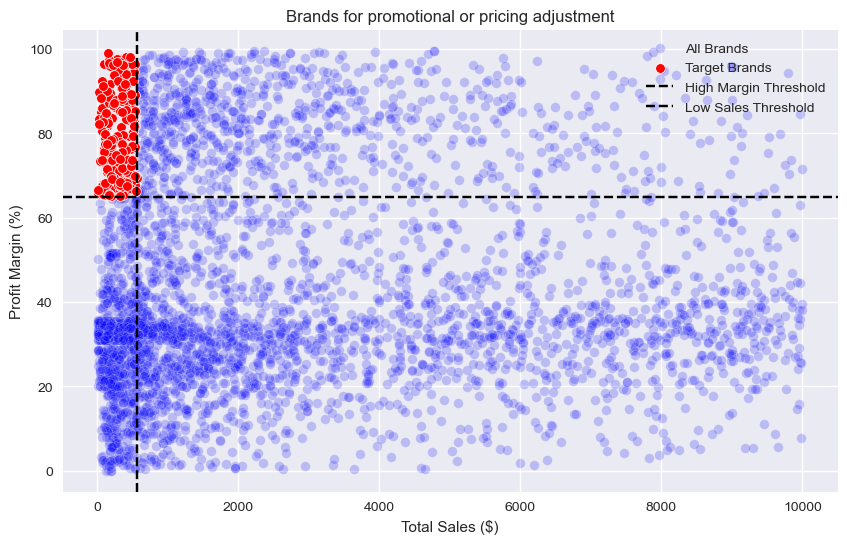

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x="total_dollars",y="ProfitMargin",color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x="total_dollars",y="ProfitMargin",color="red",label="Target Brands")
plt.axhline(high_profit_threshold,linestyle="--",color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold,linestyle="--",color='black',label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing adjustment")
plt.legend()
plt.grid(True)
plt.show()

# Which vendors and brands demonstrate the highest sales performance ?


In [57]:
df.columns

Index(['VendorName', 'VendorNumber', 'Brand', 'Description', 'PurchasePrice',
       'actual_price', 'Volume', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_quantity', 'total_dollars',
       'total_sales', 'total_ExciseTax', 'freight_cost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [59]:
# top vendors and brands by sales performance
top_vendors=df.groupby("VendorName")["total_dollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["total_dollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: total_dollars, dtype: float64

In [61]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: total_dollars, dtype: float64

In [63]:
def format_dollars(value):
    if value >= 1000000:
        return f"{value/1000000:.2f}M"
    elif value >=1000:
        return f"{value/1000:.2f}K"
    else:
        return str(value)



In [65]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: total_dollars, dtype: object

In [67]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: total_dollars, dtype: object

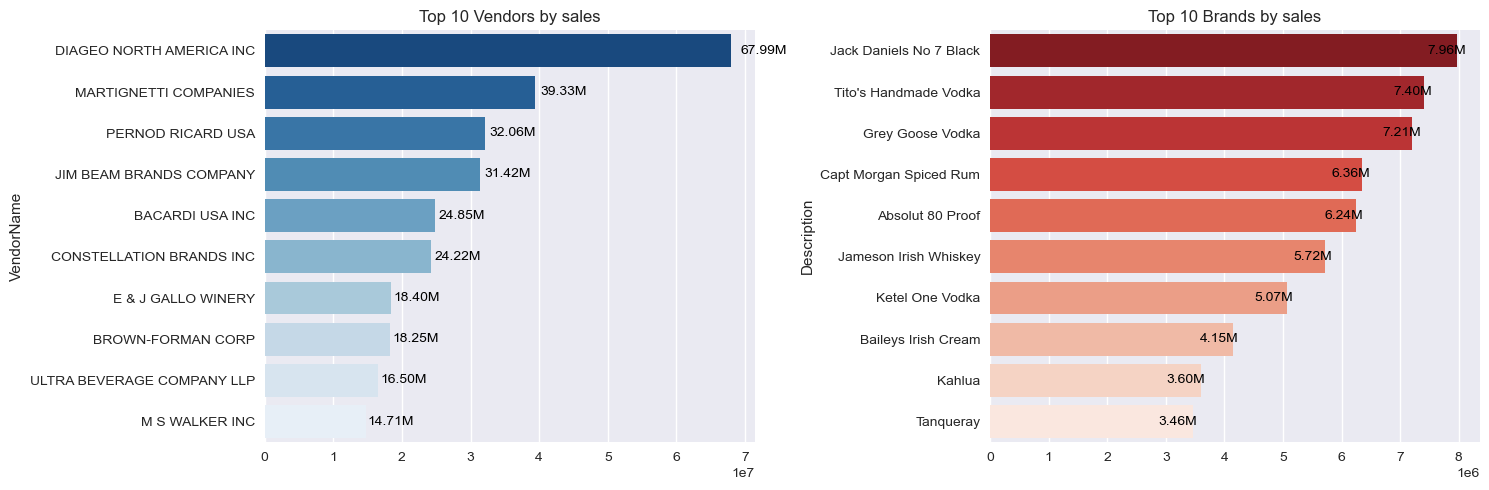

In [69]:
# now we can visualize using bar plot
plt.figure(figsize=(15,5))

#plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() *0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha='left',va='center',fontsize=10,color='black')

#plot for top brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index,x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() *0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha='right',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()

# which vendor contribute the most to total purchase

In [72]:
df.columns

Index(['VendorName', 'VendorNumber', 'Brand', 'Description', 'PurchasePrice',
       'actual_price', 'Volume', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_quantity', 'total_dollars',
       'total_sales', 'total_ExciseTax', 'freight_cost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [74]:
vendor_performance=df.groupby("VendorName").agg({
    'total_purchase_dollars':'sum',
    'GrossProfit':'sum',
    'total_sales':'sum'
}).reset_index()
vendor_performance

,VendorName,total_purchase_dollars,GrossProfit,total_sales
0,ADAMBA IMPORTS INTL INC,446.16,258.37,494.67
1,ALISA CARR BEVERAGES,25698.12,78772.82,42076.18
2,ALTAMAR BRANDS LLC,11706.20,4000.61,13007.39
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,287.84
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,92722.62
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,35086.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,307909.19
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,4834787.92
117,WINE GROUP INC,5203801.17,3100242.11,3822353.48


In [76]:
vendor_performance['PurchaseContribution%']=vendor_performance['total_purchase_dollars']/vendor_performance['total_purchase_dollars'].sum()*100

In [78]:
vendor_performance

,VendorName,total_purchase_dollars,GrossProfit,total_sales,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,494.67,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,42076.18,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,13007.39,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,287.84,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,92722.62,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,35086.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,307909.19,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,4834787.92,1.912074
117,WINE GROUP INC,5203801.17,3100242.11,3822353.48,1.693183


In [80]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [82]:
vendor_performance

,VendorName,total_purchase_dollars,GrossProfit,total_sales,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,25515802.48,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,15200040.87,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,12777311.88,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,16253249.76,7.64
6,BACARDI USA INC,17432020.26,7422796.88,8826978.82,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,215.73,0.00
107,UNCORKED,118.74,58.20,88.47,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,216.69,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,113.94,0.00


In [84]:
#display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['total_purchase_dollars']=top_vendors['total_purchase_dollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['total_sales']=top_vendors['total_sales'].apply(format_dollars)
top_vendors


,VendorName,total_purchase_dollars,GrossProfit,total_sales,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,25.52M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,15.20M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,12.78M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,16.25M,7.64
6,BACARDI USA INC,17.43M,7.42M,8.83M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,9.51M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,6.99M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,8.26M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,8.96M,3.63
53,M S WALKER INC,9.76M,4.94M,6.77M,3.18


In [86]:
#adding cumulative contribution column
top_vendors['Cumulative_Contribution']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,total_purchase_dollars,GrossProfit,total_sales,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,25.52M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,15.20M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,12.78M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,16.25M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,8.83M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,9.51M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,6.99M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,8.26M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,8.96M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,6.77M,3.18,65.69


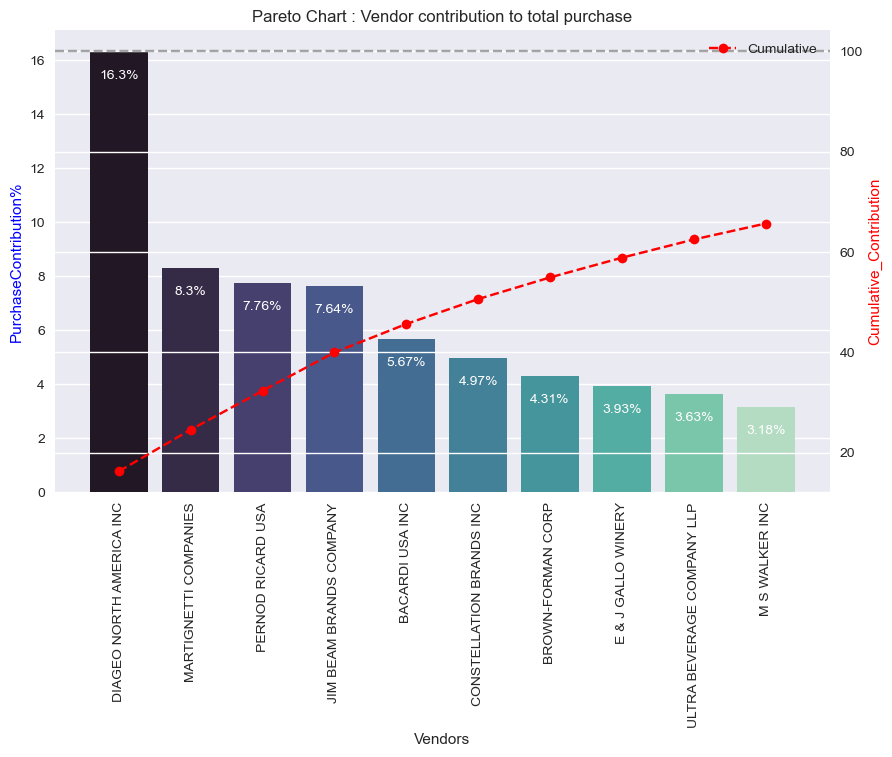

In [88]:
fig,ax1=plt.subplots(figsize=(10,6))
#barplot for purchase contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette='mako',ax=ax1)

for i,value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

#line plot for cumulative contribution
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution'],color='red',marker='o',linestyle='dashed',label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('PurchaseContribution%',color='blue')
ax2.set_ylabel('Cumulative_Contribution',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart : Vendor contribution to total purchase')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.show()



# How much of total procurement is dependent on the top vendors

In [91]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total purchase contribution of top 10 vendors is 65.69%


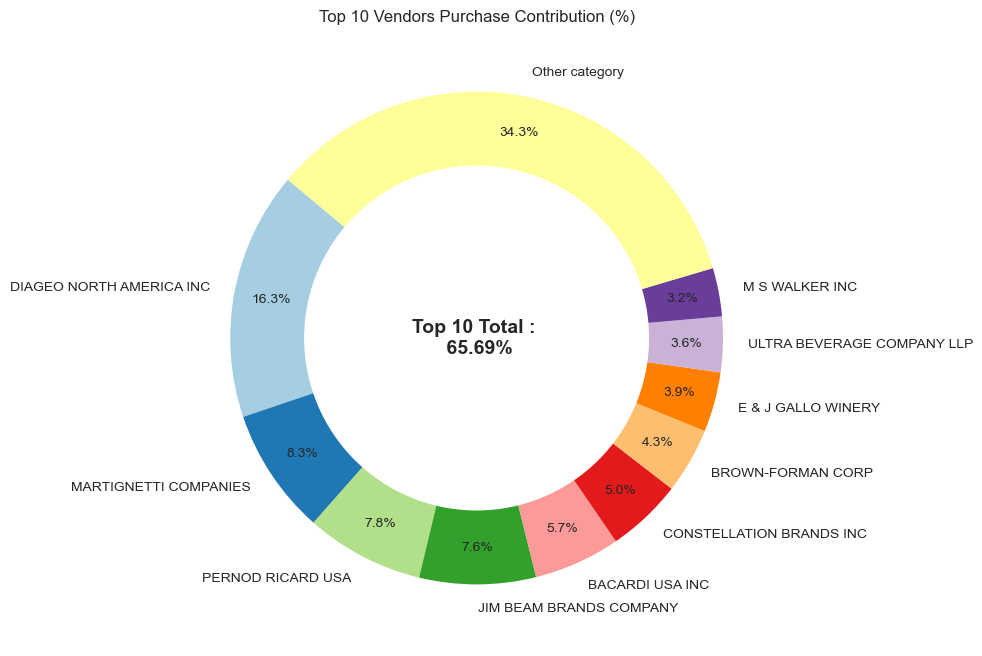

In [93]:
#we will show this with the help of pie chart
vendors=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

#append other vendors category
vendors.append('Other category')
purchase_contribution.append(remaining_contribution)

#Donut chard
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotext=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a donut effect
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#add total contribution annotation in the centre
plt.text(0,0,f"Top 10 Total : \n {total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')
plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

# Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost saving

In [96]:
df.columns

Index(['VendorName', 'VendorNumber', 'Brand', 'Description', 'PurchasePrice',
       'actual_price', 'Volume', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_quantity', 'total_dollars',
       'total_sales', 'total_ExciseTax', 'freight_cost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [98]:
df['UnitPurchasePrice']=df['total_purchase_dollars']/df['total_purchase_quantity']
df["OrderSize"]=pd.qcut(df['total_purchase_quantity'],q=3,labels=['small','medium','large'])
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.068186
medium,15.486414
large,10.777625


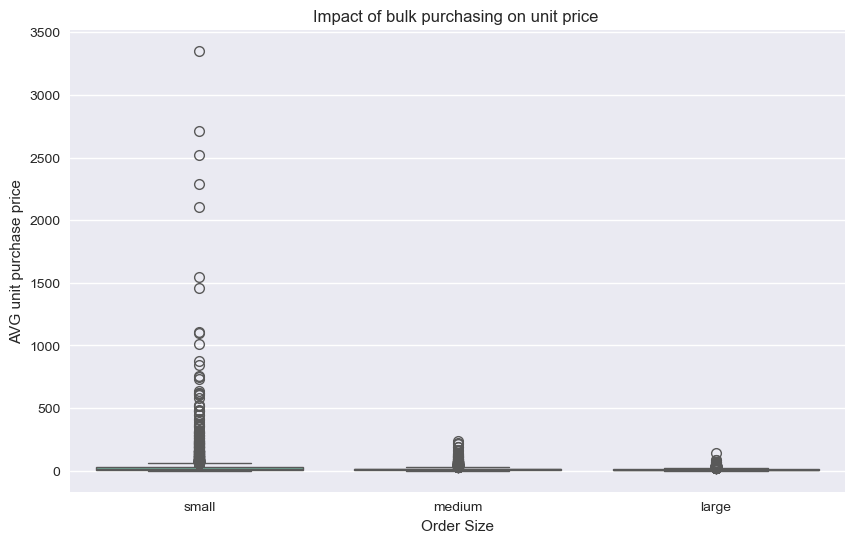

In [100]:
# we can create box plot now for this data
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette='Set2')
plt.title("Impact of bulk purchasing on unit price ")
plt.xlabel("Order Size")
plt.ylabel("AVG unit purchase price")
plt.show()


* Vendors buying in bulk large order size gets the lowest unit price (10.78$) per unit , meaning higher margins if they can manage inventory effeciently
* The price difference between small and large orders is substantial ~72 % reduction in unit cost.
* This suggest that bulk buying stratergies successfully encourage vendors to purchase in large volumes, leading to higher overall sales despite lower per unit revenue.

# Which vendors have low inventory turnover, indicating excess stock and slow moving products ?

In [104]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
CASTLE BRANDS CORP.,0.100168
WESTERN SPIRITS BEVERAGE CO,0.233765
OLE SMOKY DISTILLERY LLC,0.238449
CAMPARI AMERICA,0.257477
DUGGANS DISTILLED PRODUCTS,0.331326
SAZERAC CO INC,0.353986
LATITUDE BEVERAGE COMPANY,0.360833
HEAVEN HILL DISTILLERIES,0.372631
DIAGEO NORTH AMERICA INC,0.386449


# how much capital is locked in unsold inventory per vendor and which vendors contribute the most to it ?

In [107]:
df["UnsoldInventoryValue"]=(df["total_purchase_quantity"]-df["total_quantity"])*df["PurchasePrice"]
print("Total unsold capital",format_dollars(df["UnsoldInventoryValue"].sum()))

Total unsold capital 2.71M


In [109]:
#aggregate capital locked per vendor
inventory_value_per_vendor=df.groupby("VendorName")['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor

#sort vendors with highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


# what is the 95% confidence interval for profit margins of top-performing and low-performing vendors


In [112]:
top_threshold=df['total_sales'].quantile(0.75)
low_threshold=df['total_sales'].quantile(0.25)

top_vendors=df[df['total_sales'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['total_sales'] <= low_threshold]['ProfitMargin'].dropna()

In [114]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3418    75.867661
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
Name: ProfitMargin, Length: 2141, dtype: float64

In [116]:
low_vendors

2591    24.817831
3132    20.891217
3879    34.667880
3971    22.540050
4164    34.159351
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [118]:
def confidance_interval(data,confidance=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) #statndard error
    t_critical=stats.t.ppf((1+confidance)/2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error


Top vendors 95% CI : (30.55,31.41),mean : 30.98
Low vendors 95% CI : (38.06,40.01),mean : 39.04


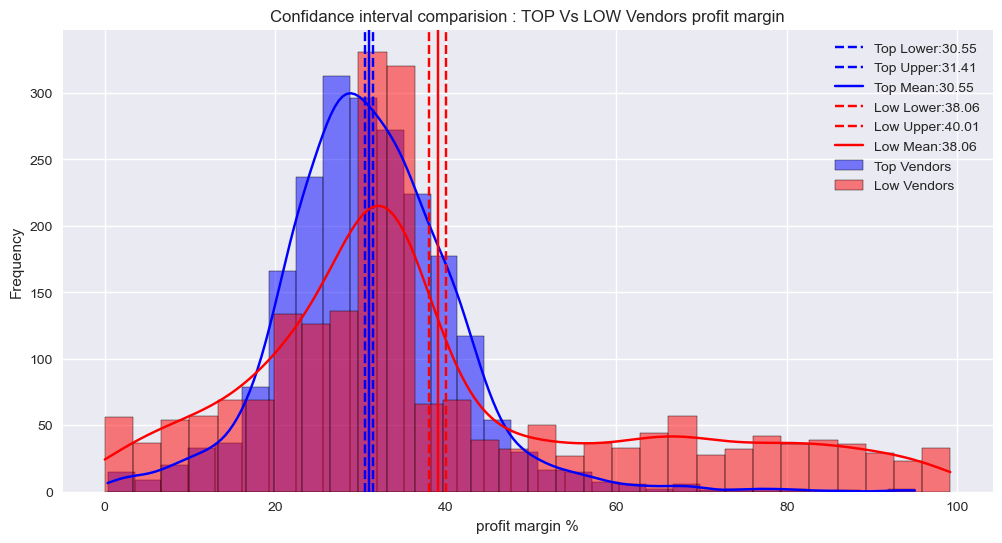

In [120]:
top_mean,top_lower,top_upper=confidance_interval(top_vendors)
low_mean,low_lower,low_upper=confidance_interval(low_vendors)

print(f"Top vendors 95% CI : ({top_lower:.2f},{top_upper:.2f}),mean : {top_mean:.2f}")
print(f"Low vendors 95% CI : ({low_lower:.2f},{low_upper:.2f}),mean : {low_mean:.2f}")

plt.figure(figsize=(12,6))
#Top vendor plot
sns.histplot(top_vendors,kde=True,color='blue',bins=30,alpha=0.5,label='Top Vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper,color='blue',linestyle='--',label=f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean,color='blue',linestyle='-',label=f"Top Mean:{top_lower:.2f}")

#Low vendor plot
sns.histplot(low_vendors,kde=True,color='red',bins=30,alpha=0.5,label='Low Vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f"Low Lower:{low_lower:.2f}")
plt.axvline(low_upper,color='red',linestyle='--',label=f"Low Upper:{low_upper:.2f}")
plt.axvline(low_mean,color='red',linestyle='-',label=f"Low Mean:{low_lower:.2f}")

#final plot
plt.title("Confidance interval comparision : TOP Vs LOW Vendors profit margin")
plt.xlabel("profit margin %")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


> For confidence interval for low performing vendors (38.06 to 40.01)% is significantly higher than that of top performing vendors (30.55,31.41)%
> This suggest that vendors with lower sales tend to maintain higher profit margin , potentially due to premium pricing or lower operation costs.
> For high performing vendors: if they aim to improve profitability ,they could explore selective price adjustment,cost optimization or bundling stratergies
> for low performing vendors: despite higher margin ,their low sales volume might indicate a need for better marketing ,competetive pricing or improved distribution startergies.

# Is there significant difference in profit margin between top performance and low performance vendors?
## Hypothesis
### H0 (null hypothesis) : there is significant difference in the mean profit margins of top performing and low performing vendors.
### H1 (alternative hypothesis) : The mean profit margins of top performing and low performing verdors are significanlty different

In [126]:
top_threshold=df['total_sales'].quantile(0.75)
low_threshold=df['total_sales'].quantile(0.25)

top_vendors=df[df['total_sales'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['total_sales'] <= low_threshold]['ProfitMargin'].dropna()
#perform two sample T-Test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=True)
#print result
print(f"T-Statistics : {t_stat:.4f}, P-Value : {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0 : there is significant difference in profit margin between top vendors and low vendors")
else:
    print("Failed to reject H0 : No significant difference in profig margins")

T-Statistics : -14.7884, P-Value : 0.0000
Reject H0 : there is significant difference in profit margin between top vendors and low vendors
